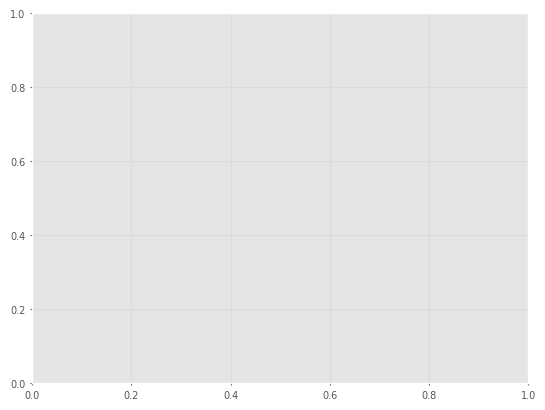

In [1]:
from Scripts.TestEnvironmentPathPlanning import *



In [2]:

config = yaml.load(open("./Datasets/profile.yml"), Loader=yaml.FullLoader)
config= config["Cities"]
"""Initializing Image"""
testingCity = "Newyork"
config = config[testingCity]

city = config["city"]
map_path = config["map_path"]

img = np.array(Image.open(map_path).convert("L"))

meterWidth = 5000
pxlPerMeter = img.shape[0] / meterWidth

img[img < 255] = 0
img[img == 255] = 1

"""Generate Paths"""
num_locations = 20
pathfile = config["pathfile"]
findPathsThroughRandomPoints(img, num_locations, pathfile)

"""Original"""
# pathfile='./results/TestEnvironmentFiles/Paths/testEnvPath1_5kmrad_100pdi_0.2line.npy'
# pathfile='./results/TestEnvironmentFiles/Paths/testEnvMultiplePaths1_5kmrad_100pdi_0.2line.npy'
# pathfile='./results/TestEnvironmentFiles/Paths/testEnvMultiplePathsSeparate_5kmrad_100pdi_0.2line.npy'

"""Scaled"""

# print(f"scaled width{np.shape(path_img)[0], np.shape(path_img)[1]}, pxlPerMeter{np.shape(path_img)[0]/meterWidth, np.shape(path_img)[1]/meterWidth}")
# path= remove_consecutive_duplicates(list(zip(path_x, path_y)))

# path_x, path_y = zip(*np.load(pathfile,allow_pickle=True)[0])
# plt.imshow(img, cmap='gray')
# plt.plot(path_x, path_y, 'r-')
# plt.grid('off')
# plt.show()


output_file {outfile} exists, using existing file ...


'Scaled'

In [3]:

"""Run Simulation"""
# runSimulation(path_x, path_y, path_img)

paths = np.load(pathfile,allow_pickle=True)


# for path_num in range(len(paths)):
for path_idx, path in enumerate(paths):
    simulation_result_file=Path(f"Results/TestEnvironmentFiles/TraverseInfo/{city}{path_idx}.npz")
    if simulation_result_file.exists():
        print(f"{simulation_result_file} exixts, using existing file ...")
        continue
    
    scale = 1
    path_x, path_y, scaled_img, path_img, currentPxlPerMeter = rescalePath(
        paths, path_idx, img, scale, pxlPerMeter
    )
    noVisualizationDrive(
        path_x,
        path_y,
        path_img,
        simulation_result_file,
        frames=len(path_x) * 3,
    )


simulating output to newyork0.npz :   0%|          | 0/4386 [00:00<?, ?it/s]

simulating output to newyork8.npz : 100%|██████████| 2757/2757 [00:04<00:00, 648.50it/s] 


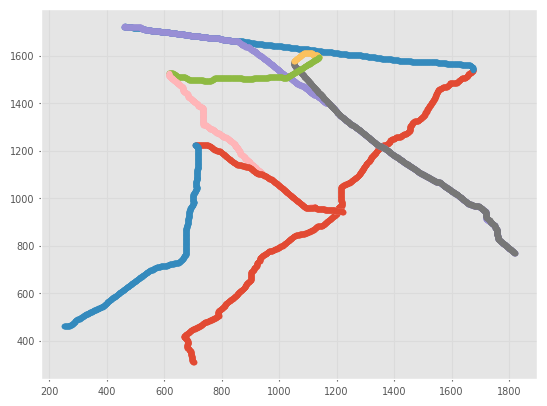

In [4]:
plt.figure("test")
legends=[]
for idx, path in enumerate(paths):
    path_x, path_y=zip(*path)
    plt.plot(path_x,path_y,'.')
    legends.append(f"path {idx}")

plt.show()

In [17]:

# paths=np.load(pathfile,allow_pickle=True)
# scale,index=1,0
# path_x, path_y, path_img, currentPxlPerMeter= rescalePath(paths, index, img, scale, pxlPerMeter)
# noVisualisationDrive(path_x, path_y, index, frames=len(path_x)*3)
from math import ceil, sqrt

"""Test Stored Traverse"""
N=len(paths)
sqN=ceil(sqrt(N))
fig,axs=plt.subplots(sqN,sqN,dpi=900)
for index,path in enumerate(paths):
    ax=axs[index//sqN,index%sqN]
    path_x, path_y=zip(*paths[index])
    outfile=Path(f"Results/TestEnvironmentFiles/TraverseInfo/{city}{index}.npz")
    traverseInfo=np.load(outfile, allow_pickle=True)
    speeds,angVel,truePos, startPose=traverseInfo['speeds'], traverseInfo['angVel'], traverseInfo['truePos'], traverseInfo['startPose']

    x_integ,y_integ=pathIntegration(speeds, angVel, startPose)
    x,y=zip(*truePos)

    ax.plot(x_integ,y_integ, 'g.-')
    ax.plot(x, y, 'b--')
    ax.plot(path_x, path_y, 'r--')
    ax.axis('equal')
    # ax.title(f"simulation on {city} map")
    ax.legend(['Integrated Position','Simulated Path','True Position', ])
fig.set_size_inches(21,21)
fig.savefig("result.png")


In [7]:
plt.show()